In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.shape

(5000, 14)

In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing data.

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [8]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
# Split the data into X and y.

X = df.drop(['Personal Loan'], axis=1)

X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [10]:
y = df.iloc[:,7:8]

y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split the data into train and test datset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.shape

(3500, 11)

In [14]:
X_test.shape

(1500, 11)

In [15]:
y_train.shape

(3500, 1)

In [16]:
y_test.shape

(1500, 1)

__Prepruning using RandomForrestClassifier to select the most important varibales__

In [17]:
# Using RandomForrestClassifier on train dataset.

rf_model = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [18]:
rf_model.fit(X=X_train, y=y_train)

C:\Users\comp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
print('The oob Accuracy Score is :', rf_model.oob_score_)

The oob Accuracy Score is : 0.9865714285714285


In [20]:
for feature, imp in zip(X_train, rf_model.feature_importances_):
    print(feature, imp);

Age 0.0457896390346763
Experience 0.04687435243153584
Income 0.35132059446164665
Family 0.086682116260515
CCAvg 0.18670020247118974
Education 0.15565680290450795
Mortgage 0.045610472035405136
Securities Account 0.005992588682234895
CD Account 0.05619039168590264
Online 0.008830728872887677
CreditCard 0.010352111159498077


The most important feature variables are : 'Income', 'CCAvg', 'Education', 'Family'.

__Using DecisionTreeClassifier to build the model__

In [21]:
# Using the test dataset important variables.

imp_features = pd.DataFrame([X_train['Income'], X_train['CCAvg'], X_train['Education'], X_train['Family' ]]).T

In [23]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [24]:
tree_model.fit(X=imp_features, y=y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
with open('Dt_BL.dot', 'w') as f:
    f=tree.export_graphviz(tree_model, feature_names=['Income', 'CCAvg', 'Education', 'Family'], out_file=f);

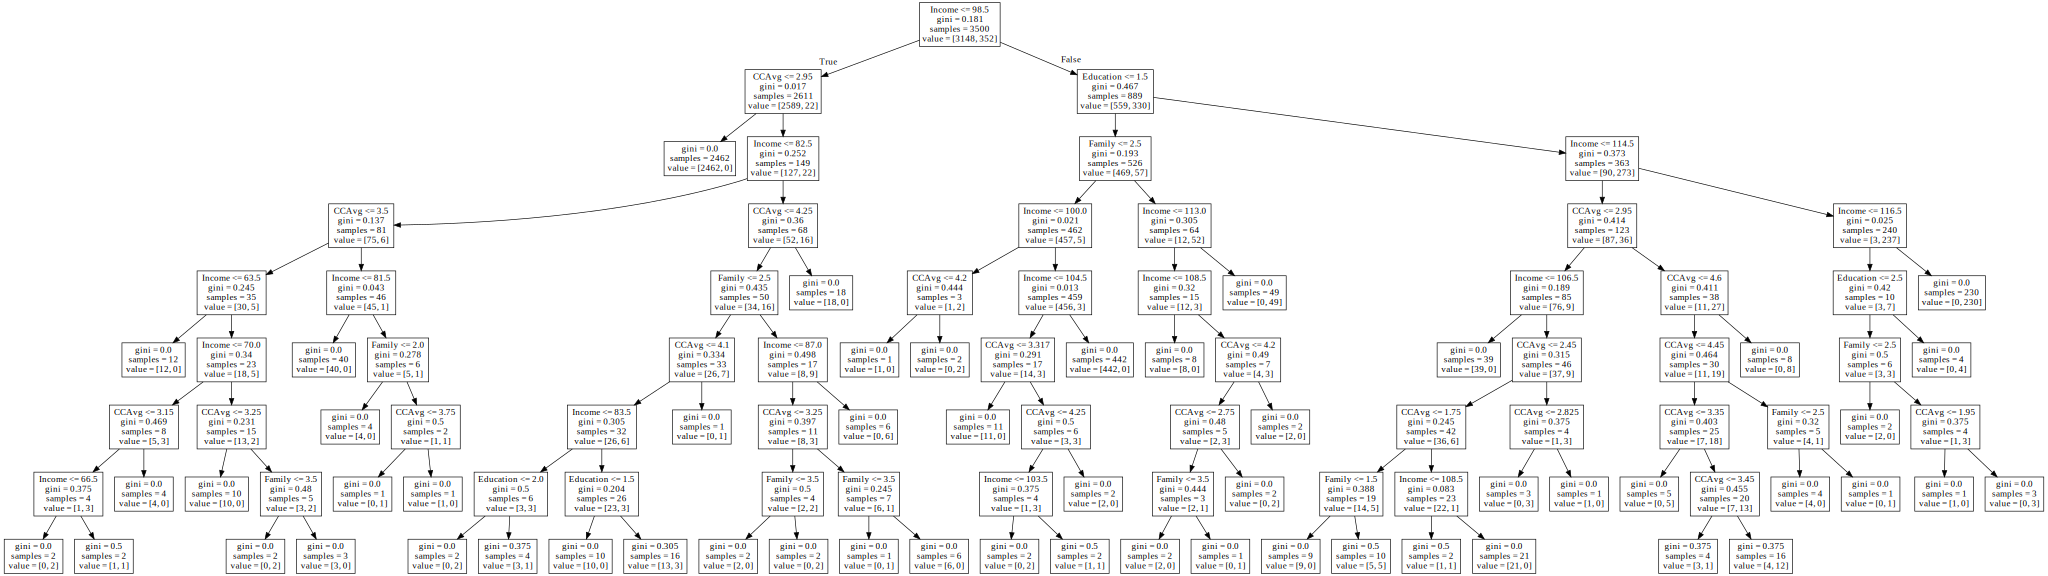

In [32]:
import graphviz

with open('Dt_BL.dot') as f:
    tr_graph = f.read()

graphviz.Source(tr_graph)

In [26]:
tree_model.score(X=imp_features, y=y_train)

0.9951428571428571

A model efficiency of 99.51% is observed.

__Using DecisionTree to predict__

In [27]:
test_features = pd.DataFrame([X_test['Income'], X_test['CCAvg'], X_test['Education'], X_test['Family']]).T

In [28]:
test_pred = tree_model.predict(X=test_features)

In [29]:
Predicted_Output = pd.DataFrame({'Age' :X_test['Age'], 'Experience' : X_test['Experience'], 'Income' : X_test['Income'], 'Family' : X_test['Family'], 'CCAvg' : X_test['CCAvg'], 'Education' : X_test['Education'], 'Personal Loan' : test_pred})

In [30]:
Predicted_Output.to_csv('BL_Output.csv', index=False)

Predicted Output has been generated in file BL_Output.csv

In [31]:
BL_Output = pd.read_csv('BL_Output.csv')

BL_Output.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan
0,54,30,23,2,0.4,1,0
1,33,9,83,1,0.1,1,0
2,54,24,72,3,1.4,3,0
3,32,7,81,4,1.8,3,0
4,40,16,120,2,6.1,1,0
5,25,-1,39,3,2.4,2,0
6,36,11,181,3,1.4,1,1
7,36,11,183,1,3.0,3,1
8,52,28,163,2,0.4,1,0
9,56,30,31,4,1.5,3,0
